<a href="https://colab.research.google.com/github/sipocz/I4_0/blob/main/SolventRecovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
from google.colab import drive
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

In [135]:
!wget "https://raw.githubusercontent.com/sipocz/DataFrame_Graph/main/grafikon.py"
!rm grafikon.py.*
from grafikon import grafikon

--2024-02-14 18:16:09--  https://raw.githubusercontent.com/sipocz/DataFrame_Graph/main/grafikon.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2539 (2.5K) [text/plain]
Saving to: ‘grafikon.py.1’

grafikon.py.1       100%[===================>]   2.48K  --.-KB/s    in 0s      

2024-02-14 18:16:09 (25.7 MB/s) - ‘grafikon.py.1’ saved [2539/2539]



In [136]:
drive.mount('/content/drive', readonly=False,force_remount=True )

Mounted at /content/drive


In [137]:
path="/content/drive/MyDrive/000_OLD_UZ"

In [138]:
fname_list=["AQ_T1201A.xlsx","AQ_T120F.xlsx","AQ_T230A.xlsx","AQ_T230F.xlsx","AQ_T340A.xlsx","AQ_T340F.xlsx","AQ_T460A.xlsx","AQ_T460F.xlsx"]

In [139]:
def get_file(fname_in):
    fname=path+"/"+fname_in
    df=pd.read_excel(fname,sheet_name=[0,1])
    df0=df[0]
    df1=df[1]

    df0.columns=["time",fname_in.split(".")[0],"status"]
    df0["time"]=pd.to_datetime(df0["time"], format="%Y-%m-%d %H:%M:%S")
    del(df0["status"])
    df0.set_index("time",inplace=True)

    df1.columns=["time",fname_in.split(".")[0],"status"]
    df1["time"]=pd.to_datetime(df1["time"], format="%Y-%m-%d %H:%M:%S")
    del(df1["status"])
    df1.set_index("time",inplace=True)

    ddf=pd.concat([df0,df1])
    ddf=ddf.resample("1Min").mean()

    return(ddf)


In [140]:
dfx=get_file("AQ_T020F.xlsx")

In [141]:
for fname in fname_list:
    df=get_file(fname)

    dfx=pd.concat([dfx,df],axis=1)

In [142]:
dfx.head()

,AQ_T020F,AQ_T1201A,AQ_T120F,AQ_T230A,AQ_T230F,AQ_T340A,AQ_T340F,AQ_T460A,AQ_T460F
time,,,,,,,,,
2023-01-02 06:15:00,NaN,NaN,NaN,12.744335,23.494089,NaN,NaN,NaN,NaN
2023-01-02 06:16:00,23.776934,17.828875,4.900117,12.660896,23.570222,12.864716,29.333354,12.079014,28.130545
2023-01-02 06:17:00,23.754014,17.819870,4.141409,12.708865,23.606270,12.909157,29.322210,12.056528,28.063407
2023-01-02 06:18:00,23.749197,17.812402,3.234768,12.674554,23.618385,12.877661,29.324866,12.114329,28.106786
2023-01-02 06:19:00,23.682667,17.808044,2.210577,12.658885,23.571005,12.904964,29.316676,12.109457,28.063775


In [143]:
df_goz=pd.read_csv(path+"/EXX_FIG101.csv")
df_goz.columns=["time","EXX_FIG101", "status"]
df_goz.dropna(inplace=True)
df_goz["time"]=pd.to_datetime(df_goz["time"], format="%m/%d/%Y %H:%M:%S %p")
df_goz.set_index("time", inplace=True)
df_goz=df_goz.resample("1Min").mean()



In [144]:
del(df_goz["status"])

In [145]:
df_goz.head()

,EXX_FIG101
time,
2021-02-01 01:00:00,1.339420
2021-02-01 01:01:00,1.357989
2021-02-01 01:02:00,1.356826
2021-02-01 01:03:00,1.348935
2021-02-01 01:04:00,1.341140


In [146]:
df_hw=pd.read_csv(path+"/QK_F_TK.csv")
df_hw.columns=["timer","QK_F_TK", "status"]
df_hw.dropna(inplace=True)
df_hw["timer"]=pd.to_datetime(df_hw["timer"], format="%m/%d/%Y %H:%M:%S %p")
df_hw.set_index("timer", inplace=True)
df_hw=df_hw.resample("1Min").mean()

In [147]:
del(df_hw["status"])

In [148]:
df_hw.head()

,QK_F_TK
timer,
2021-02-01 01:00:00,2.430703
2021-02-01 01:01:00,2.424344
2021-02-01 01:02:00,2.448461
2021-02-01 01:03:00,2.443073
2021-02-01 01:04:00,2.395650


In [149]:
dfx=pd.concat([dfx,df_hw], axis=1)



In [150]:
dfx=pd.concat([dfx,df_goz], axis=1)

In [151]:
dfx.head()

,AQ_T020F,AQ_T1201A,AQ_T120F,AQ_T230A,AQ_T230F,AQ_T340A,AQ_T340F,AQ_T460A,AQ_T460F,QK_F_TK,EXX_FIG101
2021-02-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.430703,1.339420
2021-02-01 01:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424344,1.357989
2021-02-01 01:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.448461,1.356826
2021-02-01 01:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.443073,1.348935
2021-02-01 01:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.395650,1.341140


In [153]:
dfx.dropna(inplace=True)

In [154]:
dfx.to_csv(path+"/all_data_2.csv",header=True)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

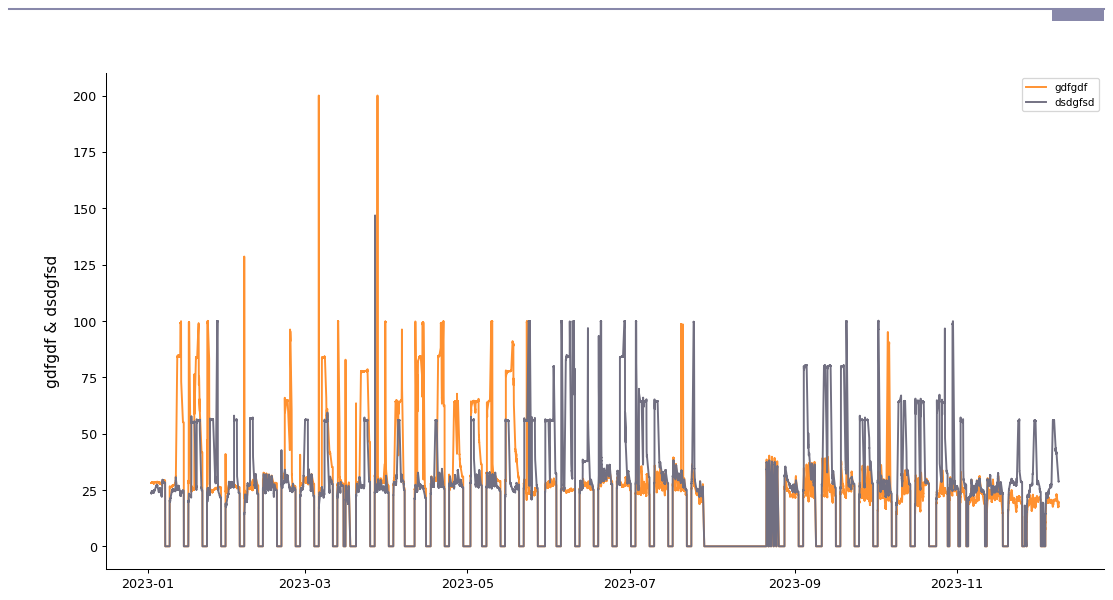

In [156]:
grafikon(dfx,"AQ_T460F","gdfgdf","AQ_T230F","dsdgfsd", n_graf=2)